# Numpy

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
# 파일 로드
DATA_URL = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'

path = tf.keras.utils.get_file('mnist.npz', DATA_URL)
with np.load(path) as data:
  train_examples = data['x_train']
  train_labels = data['y_train']
  test_examples = data['x_test']
  test_labels = data['y_test']

### tf.data.Dataset를 사용하여 Numpy 배열 로드하기

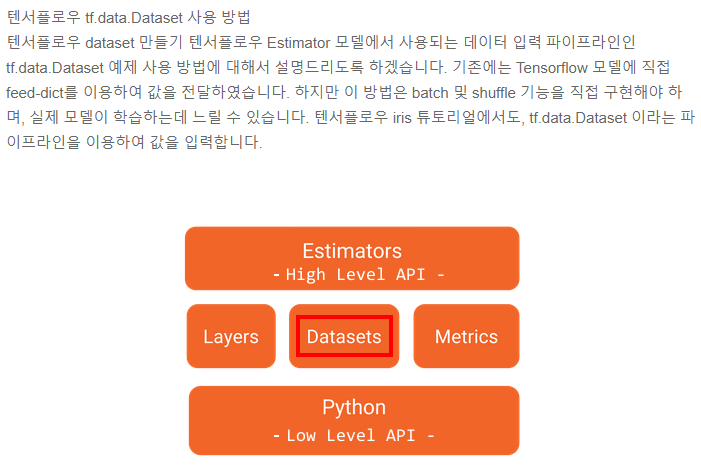

- tf.data.Dataset을 생성하여 메모리에 한번에 로드하여 사용하거나 동적으로 전달하여 사용 가능

- tf.data.Dataset.from_tensor_slices 함수는 tf.data.Dataset을 생성하는 함수

- 입력된 텐서로 부터 slices를 생성

ex) MNIST (60000, 28, 28)의 학습데이터가 입력되었다면, 60000개의 slices로 만들고 각각의 slice는 28*28의 이미지 크기를 갖게됨


데이터 로드 [tf.data: TensorFlow 입력 파이프 라인 빌드] https://www.tensorflow.org/guide/data?hl=ko

In [3]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_examples, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_examples, test_labels))

### 데이터 세트 사용하기
#### <데이터 세트 셔플 및 배치>

- batch = 모델이 1회 학습시 사용할 학습 데이터의 크기를 결정
- shuffle = 데이터의 배열이 특정 규칙이나 순서로 이루어져 있다면 편향된 학습결과를 가질 수 있기 때문에 shuffle을 통해 데이터 순서 무작위로 섞어서 방지
- 적절한 buffer size를 지정해줘야 올바른 shuffle이 이루어짐
> 처음 100개의 filenames을 buffer에 가져온 후 그 100개 중 64개를 랜덤하게 pick 한다. 만약 처음 100개의 데이터에 동일한 filename을 가진 데이터 뿐이라면 shuffle이 의미가 없음

기존의 방식으로는 feed-dict를 이용하여 값을 전달했다면

tf.data.Dataset을 사용하면 batch와 shuffle 기능을 직접 구현하지 않아도

해당 파이프라인으로 바로 값을 입력할 수 있음

In [8]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

#### <모델 빌드 및 훈련>

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy'])

# training data의 target이 one hot vector이면 categorical crossentropy
# target이 정수이면 sparse categorical crossentropy

In [16]:
model.fit(train_dataset, epochs=10)

Epoch 1/10
938/938 [==============================] - 2s 1ms/step - loss: 9.6357 - sparse_categorical_accuracy: 0.8259
Epoch 2/10
938/938 [==============================] - 1s 1ms/step - loss: 0.6359 - sparse_categorical_accuracy: 0.9163
Epoch 3/10
938/938 [==============================] - 1s 1ms/step - loss: 0.4505 - sparse_categorical_accuracy: 0.9409
Epoch 4/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3352 - sparse_categorical_accuracy: 0.9519
Epoch 5/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3113 - sparse_categorical_accuracy: 0.9590
Epoch 6/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2755 - sparse_categorical_accuracy: 0.9648
Epoch 7/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2441 - sparse_categorical_accuracy: 0.9670
Epoch 8/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2178 - sparse_categorical_accuracy: 0.9707
Epoch 9/10
938/938 [============================

In [17]:
model.evaluate(test_dataset)

157/157 [==============================] - 0s 878us/step - loss: 0.5937 - sparse_categorical_accuracy: 0.9574


[0.5937135219573975, 0.9574000239372253]

# Pandas

Cleveland Clinic Foundation for Heart Disease dataset

각 행은 환자를 설명, 각 열은 속성을 설명

환자가 심장 질환이 있는지 여부를 예측하는 이진 분류 작업

In [43]:
import pandas as pd
import tensorflow as tf

In [44]:
csv_file = tf.keras.utils.get_file('heart.csv', 'http://storage.googleapis.com/download.tensorflow.org/data/heart.csv')

In [45]:
df = pd.read_csv(csv_file)

In [46]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [47]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal         object
target        int64
dtype: object

In [48]:
df['thal'] = pd.Categorical(df['thal'])
df['thal'] = df.thal.cat.codes

In [63]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal           int8
dtype: object

In [64]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,2
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,4
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3


### tf.data.Dataset을 사용하여 데이터 로드하기

In [50]:
target = df.pop('target')

In [51]:
target

0      0
1      1
2      0
3      0
4      0
      ..
298    0
299    1
300    1
301    1
302    1
Name: target, Length: 303, dtype: int64

In [52]:
# tf.data.Dataset.from_tensor_slices를 사용하여 dataframe 에서 값 읽기
dataset = tf.data.Dataset.from_tensor_slices((df.values, target.values))

In [53]:
dataset

<TensorSliceDataset shapes: ((13,), ()), types: (tf.float64, tf.int64)>

In [54]:
# 5개만 뽑아서 dataset에 들어가있는 feature, target 보기
for feat, targ in dataset.take(5):
    print('Features: {}, Target: {}'.format(feat, targ))

Features: [ 63.    1.    1.  145.  233.    1.    2.  150.    0.    2.3   3.    0.
   2. ], Target: 0
Features: [ 67.    1.    4.  160.  286.    0.    2.  108.    1.    1.5   2.    3.
   3. ], Target: 1
Features: [ 67.    1.    4.  120.  229.    0.    2.  129.    1.    2.6   2.    2.
   4. ], Target: 0
Features: [ 37.    1.    3.  130.  250.    0.    0.  187.    0.    3.5   3.    0.
   3. ], Target: 0
Features: [ 41.    0.    2.  130.  204.    0.    2.  172.    0.    1.4   1.    0.
   3. ], Target: 0


In [55]:
tf.constant(df['thal'])

<tf.Tensor: shape=(303,), dtype=int8, numpy=
array([2, 3, 4, 3, 3, 3, 3, 3, 4, 4, 2, 3, 2, 4, 4, 3, 4, 3, 3, 3, 3, 3,
       3, 4, 4, 3, 3, 3, 3, 4, 3, 4, 3, 4, 3, 3, 4, 2, 4, 3, 4, 3, 4, 4,
       2, 3, 3, 4, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 4,
       4, 2, 3, 3, 4, 3, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 3, 3, 4, 4, 4,
       3, 3, 4, 3, 4, 4, 3, 4, 3, 3, 3, 4, 3, 4, 4, 3, 3, 4, 4, 4, 4, 4,
       3, 3, 3, 3, 4, 3, 4, 3, 4, 4, 3, 3, 2, 4, 4, 2, 3, 3, 4, 4, 3, 4,
       3, 3, 4, 2, 4, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4,
       4, 3, 3, 3, 4, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 2,
       4, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 2, 2, 4, 3, 4, 2, 4, 3,
       3, 4, 3, 3, 3, 3, 4, 3, 4, 3, 4, 2, 2, 4, 3, 4, 3, 2, 4, 3, 3, 2,
       4, 4, 4, 4, 3, 0, 3, 3, 3, 3, 1, 4, 3, 3, 3, 4, 3, 4, 3, 3, 3, 4,
       3, 3, 4, 4, 4, 4, 3, 3, 4, 3, 4, 3, 4, 4, 3, 4, 4, 3, 4, 4, 3, 3,
      

In [56]:
train_dataset = dataset.shuffle(len(df)).batch(1)

### 모델 생성 및 훈련

In [57]:
def get_compiled_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

In [58]:
model = get_compiled_model()
model.fit(train_dataset, epochs=15)

Epoch 1/15
303/303 [==============================] - 1s 659us/step - loss: 1.3734 - accuracy: 0.5780
Epoch 2/15
303/303 [==============================] - 0s 612us/step - loss: 0.6798 - accuracy: 0.7289
Epoch 3/15
303/303 [==============================] - 0s 629us/step - loss: 0.5893 - accuracy: 0.7303
Epoch 4/15
303/303 [==============================] - 0s 702us/step - loss: 0.5517 - accuracy: 0.7031
Epoch 5/15
303/303 [==============================] - 0s 619us/step - loss: 0.5587 - accuracy: 0.6706
Epoch 6/15
303/303 [==============================] - 0s 652us/step - loss: 0.5405 - accuracy: 0.7036
Epoch 7/15
303/303 [==============================] - 0s 621us/step - loss: 0.5077 - accuracy: 0.6877
Epoch 8/15
303/303 [==============================] - 0s 619us/step - loss: 0.5100 - accuracy: 0.7348
Epoch 9/15
303/303 [==============================] - 0s 705us/step - loss: 0.5437 - accuracy: 0.6972
Epoch 10/15
303/303 [==============================] - 0s 606us/step - loss: 0.496

### Alternative to feature columns

dictionary 형태의 입력 전달을 할수도 있음

기존의 tf.keras.Sequential API보다 더 유연한 모델을 생성하는 방법으로 Keras 함수형 API를 사용하여 layer 쌓기

[함수형 API??] https://www.tensorflow.org/guide/keras/functional?hl=ko

In [59]:
inputs = {key: tf.keras.layers.Input(shape=(), name=key) for key in df.keys()}
x = tf.stack(list(inputs.values()), axis=-1)

x = tf.keras.layers.Dense(10, activation='relu')(x)
output = tf.keras.layers.Dense(1)(x)

model_func = tf.keras.Model(inputs=inputs, outputs=output)

model_func.compile(optimizer='adam',
                   loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                   metrics=['accuracy'])

In [60]:
dict_slices = tf.data.Dataset.from_tensor_slices((df.to_dict('list'), target.values)).batch(16)

In [61]:
# 각 특성 열에 대해 설정된 batch 만큼의 data를 확인할 수 있음

for dict_slice in dict_slices.take(1):
  print (dict_slice)

({'age': <tf.Tensor: shape=(16,), dtype=int32, numpy=array([63, 67, 67, 37, 41, 56, 62, 57, 63, 53, 57, 56, 56, 44, 52, 57])>, 'sex': <tf.Tensor: shape=(16,), dtype=int32, numpy=array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1])>, 'cp': <tf.Tensor: shape=(16,), dtype=int32, numpy=array([1, 4, 4, 3, 2, 2, 4, 4, 4, 4, 4, 2, 3, 2, 3, 3])>, 'trestbps': <tf.Tensor: shape=(16,), dtype=int32, numpy=
array([145, 160, 120, 130, 130, 120, 140, 120, 130, 140, 140, 140, 130,
       120, 172, 150])>, 'chol': <tf.Tensor: shape=(16,), dtype=int32, numpy=
array([233, 286, 229, 250, 204, 236, 268, 354, 254, 203, 192, 294, 256,
       263, 199, 168])>, 'fbs': <tf.Tensor: shape=(16,), dtype=int32, numpy=array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0])>, 'restecg': <tf.Tensor: shape=(16,), dtype=int32, numpy=array([2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0])>, 'thalach': <tf.Tensor: shape=(16,), dtype=int32, numpy=
array([150, 108, 129, 187, 172, 178, 160, 163, 147, 155, 148, 153, 142,
  

In [62]:
model_func.fit(dict_slices, epochs=15)

Epoch 1/15
19/19 [==============================] - 0s 1ms/step - loss: 19.6931 - accuracy: 0.7493
Epoch 2/15
19/19 [==============================] - 0s 1ms/step - loss: 16.4290 - accuracy: 0.7493
Epoch 3/15
19/19 [==============================] - 0s 1ms/step - loss: 13.6172 - accuracy: 0.7493
Epoch 4/15
19/19 [==============================] - 0s 2ms/step - loss: 11.1820 - accuracy: 0.7493
Epoch 5/15
19/19 [==============================] - 0s 1ms/step - loss: 9.0445 - accuracy: 0.7493
Epoch 6/15
19/19 [==============================] - 0s 1ms/step - loss: 7.1432 - accuracy: 0.7493
Epoch 7/15
19/19 [==============================] - 0s 1ms/step - loss: 5.4220 - accuracy: 0.7493
Epoch 8/15
19/19 [==============================] - 0s 1ms/step - loss: 3.8388 - accuracy: 0.7493
Epoch 9/15
19/19 [==============================] - 0s 1ms/step - loss: 2.3813 - accuracy: 0.7514
Epoch 10/15
19/19 [==============================] - 0s 1ms/step - loss: 1.3958 - accuracy: 0.7639
Epoch 11/15
19/